**Fashion MNIST Dataset:**

The Fashion MNIST dataset is a popular benchmark dataset often used as an alternative to the original MNIST dataset for testing machine learning and computer vision models. It consists of grayscale images of various fashion items, and the task is to classify these items into one of ten categories. Each image is a 28x28 pixel grayscale image.

Here are the ten categories in the Fashion MNIST dataset:

1. T-shirt/top
2. Trouser
3. Pullover
4. Dress
5. Coat
6. Sandal
7. Shirt
8. Sneaker
9. Bag
10. Ankle boot

The dataset is widely used for tasks related to image classification and deep learning model evaluation. It's a bit more challenging than the original MNIST dataset due to the greater variety in the types of items and their more complex patterns.

In [1]:
# Importing basic packages

import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
sns.set_style('whitegrid')

In [2]:
# Importing tensorflow,keras

import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.datasets import fashion_mnist

In [3]:
# Loading the fashion mnist dataset:

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

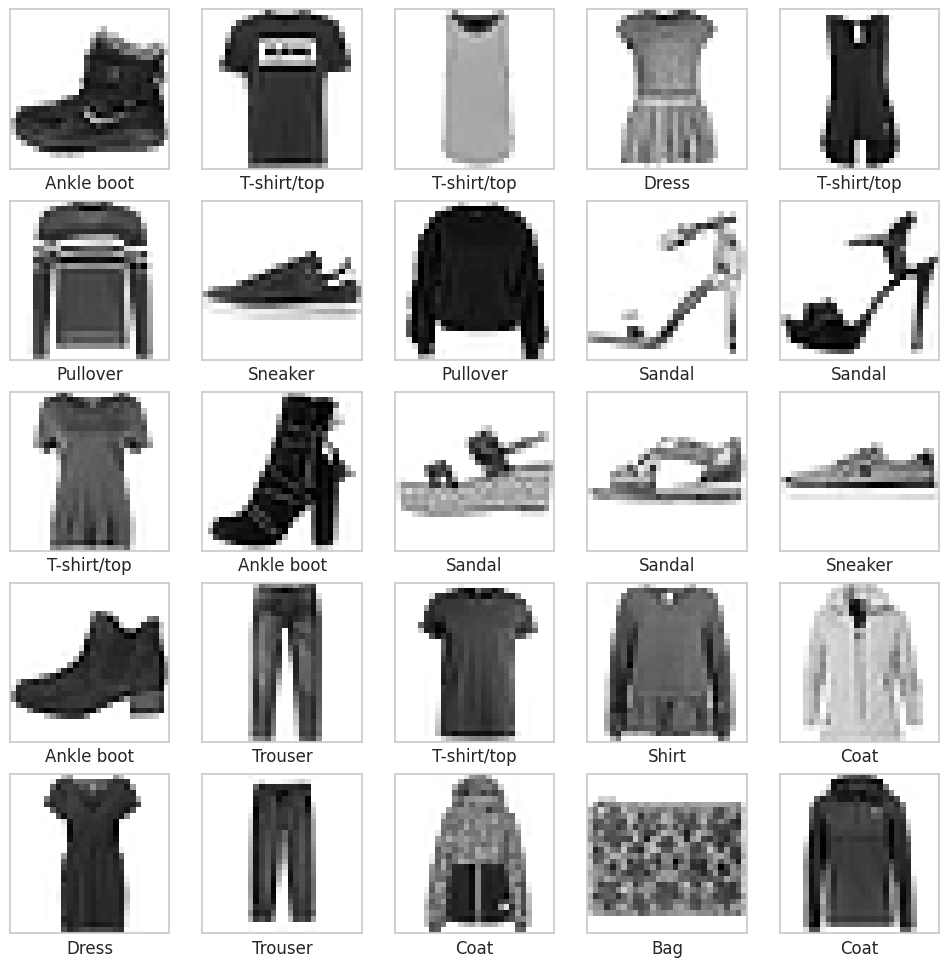

In [4]:
# Visualising the objects:

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize=(12,12))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])

plt.show()

In [5]:
# Now reshaping the training and testing data to have a single channel (grayscale images) and the dimensions expected by the CNN model (28x28x1).

x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [6]:
# Now normalising the pixel values in order help the model converge faster:

x_train = x_train/255.
x_test = x_test/255.

In [7]:
# Now converting the categorical labels into one hot encoding:

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Building a CNN Model

In [8]:
# Importing necessary libraries

from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout

In [9]:
# Building  a simple CNN architecture

# Building a sequential API
model = Sequential()

# part 1
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

# part 2
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

# part 3
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

# Flatten
model.add(Flatten())

# Building the DNN model
model.add(Dense(units=64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(units=32, activation = 'relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(units=10, activation = 'softmax'))

# Model compilation
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [10]:
# Training the model

history = model.fit(x_train, y_train, validation_data = (x_test, y_test), batch_size = 64, epochs = 100)

Epoch 1/100
938/938 [==============================] - 23s 9ms/step - loss: 1.0339 - accuracy: 0.6481 - val_loss: 0.5399 - val_accuracy: 0.7987
Epoch 2/100
938/938 [==============================] - 7s 7ms/step - loss: 0.6560 - accuracy: 0.7750 - val_loss: 0.4670 - val_accuracy: 0.8286
Epoch 3/100
938/938 [==============================] - 7s 7ms/step - loss: 0.5759 - accuracy: 0.8052 - val_loss: 0.4328 - val_accuracy: 0.8494
Epoch 4/100
938/938 [==============================] - 8s 8ms/step - loss: 0.5300 - accuracy: 0.8236 - val_loss: 0.3953 - val_accuracy: 0.8588
Epoch 5/100
938/938 [==============================] - 6s 7ms/step - loss: 0.4953 - accuracy: 0.8360 - val_loss: 0.3850 - val_accuracy: 0.8655
Epoch 6/100
938/938 [==============================] - 7s 8ms/step - loss: 0.4669 - accuracy: 0.8450 - val_loss: 0.3756 - val_accuracy: 0.8706
Epoch 7/100
938/938 [==============================] - 7s 7ms/step - loss: 0.4449 - accuracy: 0.8536 - val_loss: 0.3631 - val_accuracy: 0.872

In [11]:
# This code trains your CNN model on the Fashion MNIST dataset for 10 epochs with a batch size of 64.

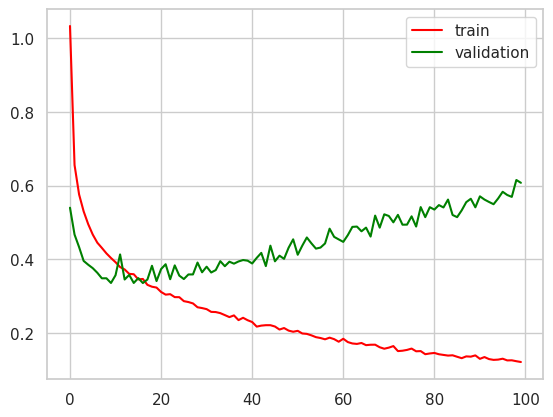

In [12]:
# Plotting the graph to visualize the loss over the epochs

plt.plot(history.history['loss'], color = 'red', label='train')
plt.plot(history.history['val_loss'], color = 'green', label='validation')
plt.legend()
plt.show()

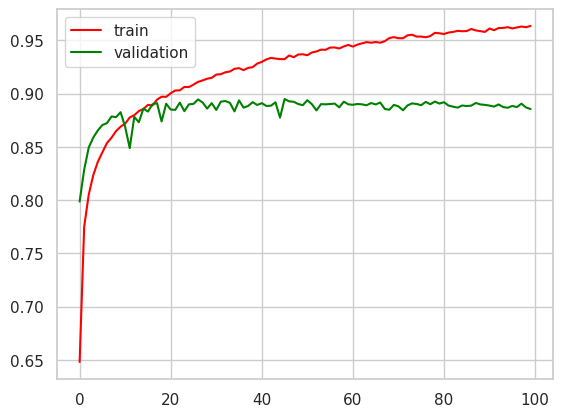

In [13]:
# Plotting the graph to visualize the accuracy over the epochs

plt.plot(history.history['accuracy'], color = 'red', label='train')
plt.plot(history.history['val_accuracy'], color = 'green', label='validation')
plt.legend()
plt.show()

## Conclusion

In this project, a Convolutional Neural Network (CNN) model was successfully constructed and trained to classify fashion items using the Fashion MNIST dataset. Fashion MNIST is a well-established benchmark for image classification, and the model was designed to identify and categorize clothing and accessory items across ten distinct classes.

The CNN model, developed with an efficient yet robust architecture, achieved a training accuracy of 96.35% and a validation accuracy of 88.56%. These results highlight the model's capacity to learn from the training data and generalize effectively to previously unseen fashion items.

The significance of these achievements extends beyond the numerical outcomes themselves. Image classification models have a wide array of applications, from enhancing e-commerce recommendation systems to the development of intelligent fashion solutions and aiding in retail inventory management.

**Introduction to the CIFAR-10 Dataset:**

The CIFAR-10 dataset is a widely-used benchmark in the field of computer vision and deep learning. It consists of 60,000 32x32 color images in 10 different classes, with each class containing 6,000 images. The dataset is divided into a training set of 50,000 images and a testing set of 10,000 images. Each image belongs to one of the following ten classes:

1. Airplane
2. Automobile
3. Bird
4. Cat
5. Deer
6. Dog
7. Frog
8. Horse
9. Ship
10. Truck

The CIFAR-10 dataset is designed for image classification tasks, making it a valuable resource for developing and evaluating deep learning models. It poses unique challenges due to its small image size and the diversity of object classes it covers.

With this dataset, you can explore a wide range of computer vision tasks, from basic image classification to more complex challenges in object recognition and pattern analysis. It serves as an excellent starting point for experimenting with convolutional neural networks (CNNs) and other image processing techniques.

In [14]:
# Loading the CIFAR 10 dataset:

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

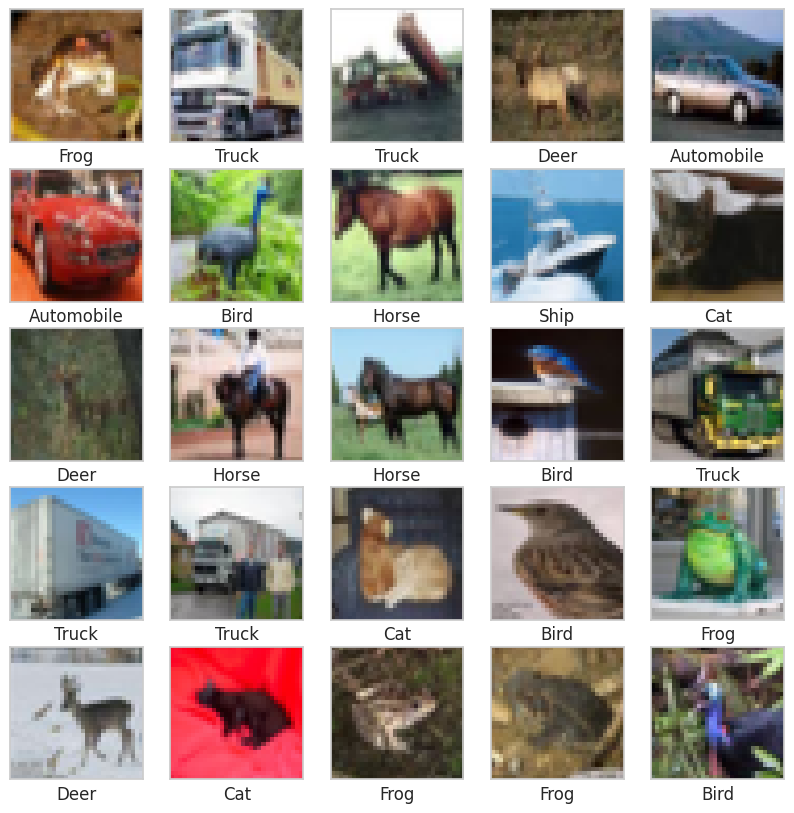

In [15]:
# Visualising the objects:

class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])
  plt.xlabel(class_names[int(y_train[i])])
plt.show()

In [16]:
# Normalizing the pixels:

x_train = x_train/255.
x_test = x_test/255.

Normalizing the pixel values to a common range (usually between 0 and 1) is essential for efficient model training. It ensures that all features are on a similar scale, which helps the model converge faster and prevents any one feature from dominating the learning process.

In [17]:
# One hot encoding:

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

Depending on the model architecture, one-hot encoding of class labels might be necessary. It transforms categorical labels into a binary matrix format, making them suitable for classification tasks.

In [18]:
# Building a CNN architecture now:

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

# Convolutional Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Convolutional Layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the feature maps
model.add(Flatten())

# Fully Connected Layer 1
model.add(Dense(512, activation='relu', kernel_regularizer = keras.regularizers.l2(0.03)))
model.add(Dropout(0.3))  # Dropout for regularization
model.add(BatchNormalization())

# Fully Connected Layer 2
model.add(Dense(128, activation='relu', kernel_regularizer = keras.regularizers.l2(0.03)))
model.add(Dropout(0.3))
model.add(BatchNormalization())

# Fully Connected Layer 3
model.add(Dense(64, activation='relu', kernel_regularizer = keras.regularizers.l2(0.03)))
model.add(Dropout(0.3))
model.add(BatchNormalization())

# Fully Connected Layer 4
model.add(Dense(32, activation='relu', kernel_regularizer = keras.regularizers.l2(0.03)))
model.add(Dropout(0.3))
model.add(BatchNormalization())

# Output Layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Early stopping is a technique used to prevent overfitting in neural networks by monitoring a chosen validation metric and stopping the training process when this metric stops improving. In your case, you're concerned with the validation accuracy not improving much after a certain point. To implement early stopping, you can use the EarlyStopping callback provided by Keras. You can monitor the validation accuracy and specify a patience value, which determines how many epochs to wait for improvement before stopping the training.

In [19]:
from keras.callbacks import EarlyStopping

# Define early stopping
early_stopping = EarlyStopping(monitor='val_accuracy',  # Monitor validation accuracy
                               patience=3,            # Number of epochs with no improvement to wait before stopping
                               verbose=1,            # Display a message when stopping
                               restore_best_weights=True, start_from_epoch=70)  # Restore the model weights from the epoch with the best validation accuracy

# The training will automatically stop when validation accuracy stops improving.
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), batch_size = 64, epochs = 500, callbacks=[early_stopping])

Epoch 1/500
782/782 [==============================] - 13s 12ms/step - loss: 4.6037 - accuracy: 0.2781 - val_loss: 1.9948 - val_accuracy: 0.3192
Epoch 2/500
782/782 [==============================] - 8s 10ms/step - loss: 1.7241 - accuracy: 0.4220 - val_loss: 1.6874 - val_accuracy: 0.4316
Epoch 3/500
782/782 [==============================] - 8s 10ms/step - loss: 1.6131 - accuracy: 0.4695 - val_loss: 1.5244 - val_accuracy: 0.4734
Epoch 4/500
782/782 [==============================] - 9s 11ms/step - loss: 1.5362 - accuracy: 0.5042 - val_loss: 1.5556 - val_accuracy: 0.4924
Epoch 5/500
782/782 [==============================] - 9s 12ms/step - loss: 1.4925 - accuracy: 0.5367 - val_loss: 1.4433 - val_accuracy: 0.5623
Epoch 6/500
782/782 [==============================] - 8s 10ms/step - loss: 1.4426 - accuracy: 0.5718 - val_loss: 1.3114 - val_accuracy: 0.6182
Epoch 7/500
782/782 [==============================] - 9s 11ms/step - loss: 1.3987 - accuracy: 0.5915 - val_loss: 1.3424 - val_accuracy

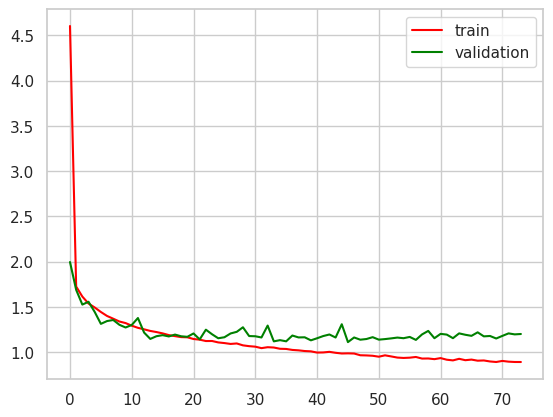

In [20]:
# Plotting the graph to visualize the loss over the epochs

plt.plot(history.history['loss'], color = 'red', label='train')
plt.plot(history.history['val_loss'], color = 'green', label='validation')
plt.legend()
plt.show()

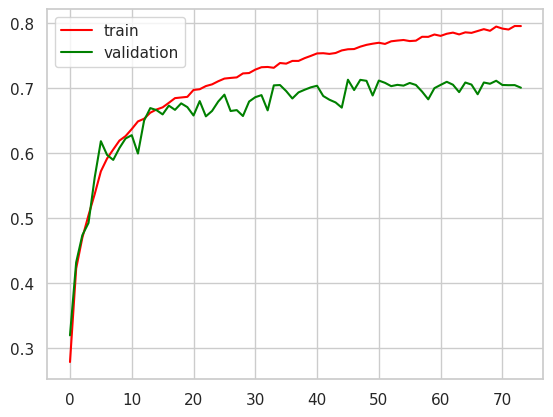

In [21]:
# Plotting the graph to visualize the accuracy over the epochs

plt.plot(history.history['accuracy'], color = 'red', label='train')
plt.plot(history.history['val_accuracy'], color = 'green', label='validation')
plt.legend()
plt.show()

In [22]:
# Using data augmentation techniques to reach satisfactory model accuracy:

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, zoom_range=0.2)

# Fitting the data generator on the training data
datagen.fit(x_train)

# creating a new model instance
model1 = Sequential()

# Convolutional Layer 1
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model1.add(MaxPooling2D((2, 2)))

# Convolutional Layer 2
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))

# Convolutional Layer 3
model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))

# Flatten the feature maps
model1.add(Flatten())

# Fully Connected Layer 1
model1.add(Dense(512, activation='relu', kernel_regularizer = keras.regularizers.l2(0.03)))
model1.add(Dropout(0.3))  # Dropout for regularization
model1.add(BatchNormalization())

# Fully Connected Layer 2
model1.add(Dense(128, activation='relu', kernel_regularizer = keras.regularizers.l2(0.03)))
model1.add(Dropout(0.3))
model1.add(BatchNormalization())

# Fully Connected Layer 3
model1.add(Dense(64, activation='relu', kernel_regularizer = keras.regularizers.l2(0.03)))
model1.add(Dropout(0.3))
model1.add(BatchNormalization())

# Fully Connected Layer 4
model1.add(Dense(32, activation='relu', kernel_regularizer = keras.regularizers.l2(0.03)))
model1.add(Dropout(0.3))
model1.add(BatchNormalization())

# Output Layer
model1.add(Dense(10, activation='softmax'))

# Compile the model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
# Define early stopping
early_stopping1 = EarlyStopping(monitor='val_accuracy',
                               patience=3,
                               verbose=1,
                               restore_best_weights=True, start_from_epoch=70)

# Training the model with data augmentation
history1 = model1.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=500, validation_data=(x_test, y_test), callbacks = [early_stopping1])

Epoch 1/500
782/782 [==============================] - 37s 42ms/step - loss: 4.6581 - accuracy: 0.2464 - val_loss: 1.9755 - val_accuracy: 0.3340
Epoch 2/500
782/782 [==============================] - 33s 42ms/step - loss: 1.8606 - accuracy: 0.3647 - val_loss: 1.7198 - val_accuracy: 0.4128
Epoch 3/500
782/782 [==============================] - 33s 42ms/step - loss: 1.7544 - accuracy: 0.4066 - val_loss: 1.6720 - val_accuracy: 0.4157
Epoch 4/500
782/782 [==============================] - 31s 40ms/step - loss: 1.7010 - accuracy: 0.4308 - val_loss: 1.4929 - val_accuracy: 0.5058
Epoch 5/500
782/782 [==============================] - 33s 42ms/step - loss: 1.6481 - accuracy: 0.4547 - val_loss: 1.5960 - val_accuracy: 0.4734
Epoch 6/500
782/782 [==============================] - 34s 43ms/step - loss: 1.6216 - accuracy: 0.4673 - val_loss: 1.4231 - val_accuracy: 0.5305
Epoch 7/500
782/782 [==============================] - 31s 40ms/step - loss: 1.5914 - accuracy: 0.4914 - val_loss: 1.4235 - val_ac

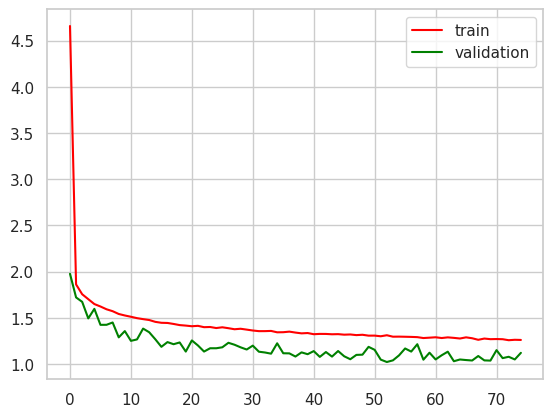

In [24]:
# Plotting the graph to visualize the loss over the epochs

plt.plot(history1.history['loss'], color = 'red', label='train')
plt.plot(history1.history['val_loss'], color = 'green', label='validation')
plt.legend()
plt.show()

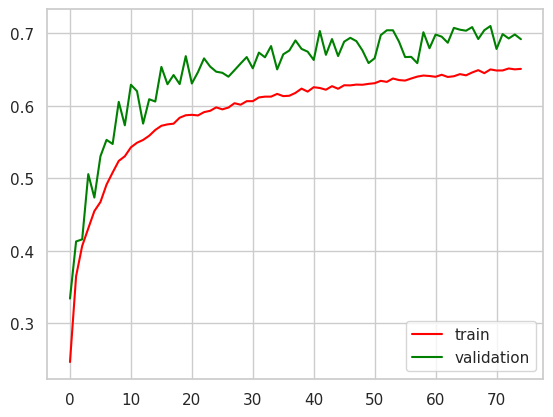

In [25]:
# Plotting the graph to visualize the accuracy over the epochs

plt.plot(history1.history['accuracy'], color = 'red', label='train')
plt.plot(history1.history['val_accuracy'], color = 'green', label='validation')
plt.legend()
plt.show()

# Conclusion

The CNN model is built on the CIFAR 10 dataset and the model that can be relied on is the CNN model without data augmentation with a train accuracy of 79.55% and validation accuracy of 70.06%.

The skills and insights gained during this project extend to various domains, from autonomous vehicles to medical imaging and beyond. The ability to train CNNs for image classification has far-reaching implications.